In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from dt_visualise import show

# Decision trees

In this section, we will investigate the utilisation of decision trees for the classification of some data. 
These are an extremely intuitive way to classify or label objects; a bit like a [Buzzfeed quiz to determine which Paul Rudd character you are](https://www.buzzfeed.com/jenniferabidor/which-paul-rudd-character-are-you) (I got Mike from Friends), a decision tree ask a series of questions designed to zero in on the classification.
An example of this for animal classification is shown below from the work of VanderPlas {cite}`vanderplas_python_2016`.

![](https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.08-decision-tree.png)

This example uses binary splitting, where each question cuts the number of options in half, which is extremely efficient in reducing the number of options. 
In traditional machine learning implementations, the questions that we ask generally involve axis-aligned splitting of the data. 
Let's have a look at what that means. 

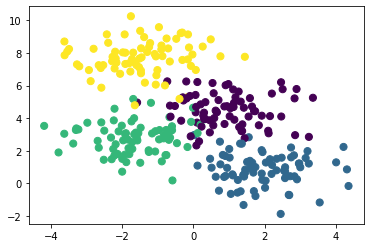

In [2]:
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.show()

A simple decision tree built on this data would iteratively split the data along the axes based on some criterion and assign a label to the new region based on the majority of the points within it. 
We can visualise this for our data above with the help of some [visualisation code](./dt_visualise.py). 

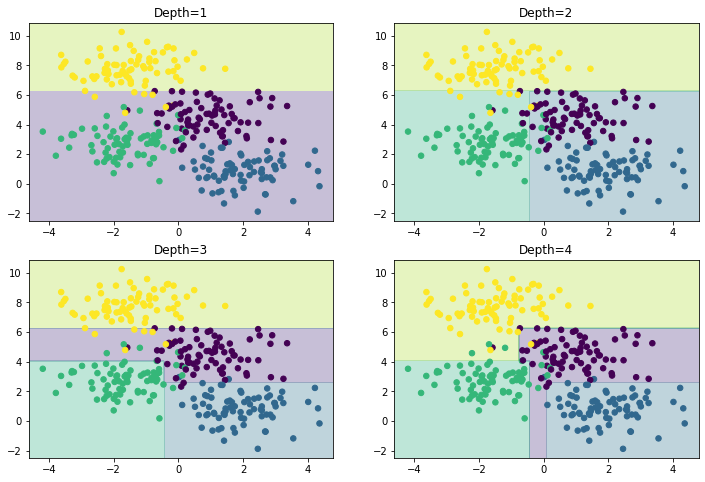

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for i, ax in enumerate(axes.flatten()):
    ax = show(DecisionTreeClassifier(max_depth=i+1), X, y, ax)
    ax.set_title(f'Depth={i+1}')
plt.show()

We can see that the first split is performed at about *y~6*, the second at *x~-0.5*, etc. 
As the depth increases, we tend to start to get more strangely shaped regions, consider a depth of five, where there is a very slim region at *x~0*. 

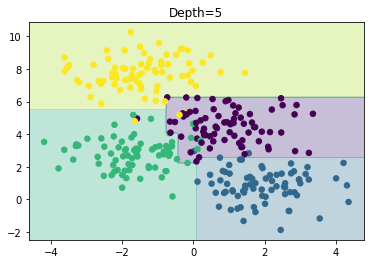

In [4]:
fig, axes = plt.subplots(1, 1, figsize=(6, 4))
axes = show(DecisionTreeClassifier(max_depth=5), X, y, axes)
axes.set_title('Depth=5')
plt.show()

It is clear that this is the result of sampling or noise in the data rather than the data itself. 
We are already starting to overfit the data. 

Overfitting is a general property of decision trees; it is easy to begin to fit the details of the data rather than the distributions that they represent. 
To see this overfitting, we can train on different subsets of the data.

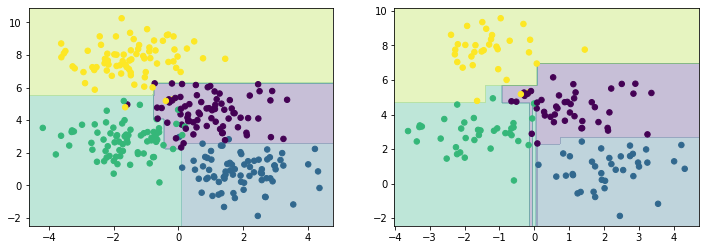

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
for i, ax in enumerate(axes):
    ax = show(DecisionTreeClassifier(max_depth=5), X[i*150:], y[i*150:], ax)
plt.show()

It is clear that in some areas, both datasets give the same result, but in others (where the classification is less certain) the results vary. 
This suggests that using multiple different trees may improve our results as we build up a more complete picture of the distribution our data is describing. 